# Assignment 1:  Review of Python, functions, plotting, numerical derivatives

Write and run python scripts that do the followin.  Upload the notebook file to the eclass page.

1.  Write a script that calculates and plots sines and cosines for 100 points between 0 and 2$\pi$

In [2]:
import matplotlib.pyplot as plt
import numpy as np

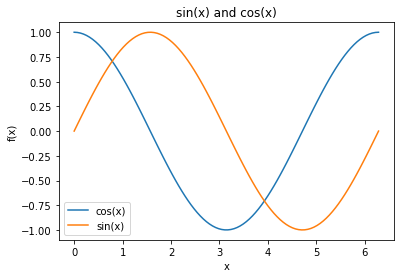

In [3]:
xdata = np.linspace(0, 2*np.pi, num=100) # discretize the x domain
ydata_cos = np.cos(xdata) # compute cos
ydata_sin = np.sin(xdata) # compute sin

#plot and label
plt.plot(xdata, ydata_cos, label='cos(x)') 
plt.plot(xdata, ydata_sin, label='sin(x)') 
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('sin(x) and cos(x)')
plt.legend()

2.  Calculate and plot the numerical derivative of the function:
$$f(x)=x^2+2\sin x$$
over the same interval and for 100 points using the finite difference equation:$$f'(x)\approx\frac{f(x+h)-f(x)}{h}$$.

Calculate the derivative using h=0.1, 0.00001,1e-9, and 1e-13.

For each value of h, plot the difference between your numerical derivative and the analytical derivative:$$\delta(x)= f'(x)-2x-2\cos x.$$  Also calculate the rms deviation for your 100 points:$$\rm{RMS}=\frac{1}{100}\sum(f'(x)-2x-2\cos x)^2$$


rms = 0.014940698353324256, for h = 0.1
rms = 1.494946490233364e-10, for h = 1e-05
rms = 3.228856962037831e-12, for h = 1e-09
rms = 0.0006860338645975053, for h = 1e-13


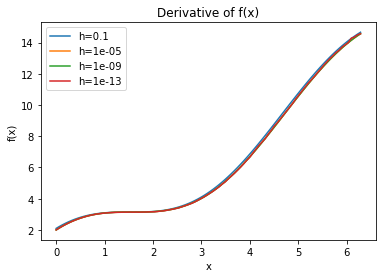

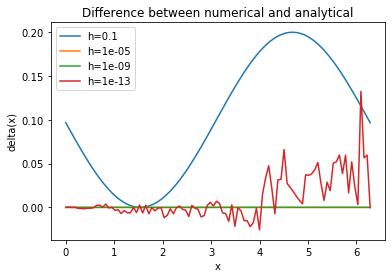

In [4]:

# define functions
f = lambda x: x**2 + 2*np.sin(x)
df = lambda x, h: (f(x + h) - f(x))/h # definition of derivative

for h in [0.1, 0.00001, 1e-9, 1e-13]:
    plt.plot(xdata, df(xdata, h), label=f'h={h}') #loop over h, and plot
plt.title('Derivative of f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.figure()

delta = lambda x, h: df(x, h) - 2*x - 2*np.cos(x) #find the difference

for h in [0.1, 0.00001, 1e-9, 1e-13]:
    plt.plot(xdata, delta(xdata, h), label=f'h={h}') # loop over h and plot
plt.title('Difference between numerical and analytical')
plt.xlabel('x')
plt.ylabel('delta(x)')
plt.legend()

for h in [0.1, 0.00001, 1e-9, 1e-13]:
    rms = (1/100)*np.sum(delta(xdata, h)**2) # compute rms for each h
    print(f"rms = {rms}, for h = {h}")

3.  Repeat (2), but now with the symmetric derivative:  $$f'(x)\approx\frac{f(x+h)-f(x-h)}{2h}.$$

rms = 5.605502737950821e-06, for h = 0.1
rms = 8.086314079847819e-20, for h = 1e-05
rms = 1.5200351402361288e-12, for h = 1e-09
rms = 0.0007232187905855187, for h = 1e-13


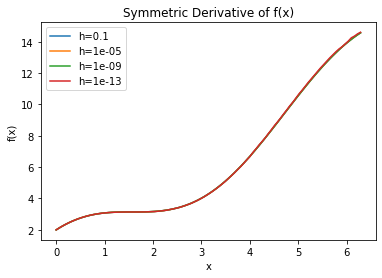

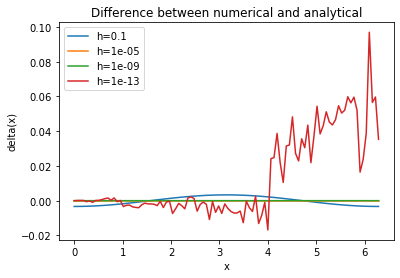

In [5]:
df_symm = lambda x, h: (f(x + h) - f(x - h))/(2*h) #definition of symmetric derivative

for h in [0.1, 0.00001, 1e-9, 1e-13]:
    plt.plot(xdata, df_symm(xdata, h), label=f'h={h}') #loop and plot over h

plt.title('Symmetric Derivative of f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.figure()

delta_symm = lambda x, h: df_symm(x, h) - 2*x - 2*np.cos(x) #difference between analytical and symmetric derivative

for h in [0.1, 0.00001, 1e-9, 1e-13]: # loop and plot
    plt.plot(xdata, delta_symm(xdata, h), label=f'h={h}')
plt.title('Difference between numerical and analytical')
plt.xlabel('x')
plt.ylabel('delta(x)')
plt.legend()

for h in [0.1, 0.00001, 1e-9, 1e-13]: # compute rms
    rms = (1/100)*np.sum(delta_symm(xdata, h)**2)
    print(f"rms = {rms}, for h = {h}")

4.  One way to lose accuracy in calculating derivatives is that, because the way numbers in the computer are represented $$(x+h)-(x-h) \neq 2h$$- and so the denominator in the derivative calculation is not actually the difference between the values at which the function is calculated.  We can get around this by using *exactly representable numbers.*  This works by defining $x_1=x-h, x_2=x+h$ and then calculating $$f'(x)\approx\frac{f(x_2)-f(x_1)}{x_2-x_1}.$$  This works because $x_1$ and $x_2$ exactly represent some numbers- and so we calculate the exact difference for those numbers.

Repeat (3) using this technique.

rms = 5.60550273789938e-06, for h = 0.1
rms = 7.916007185455267e-21, for h = 1e-05
rms = 1.189467950474785e-12, for h = 1e-09
rms = 7.147618348709526e-05, for h = 1e-13


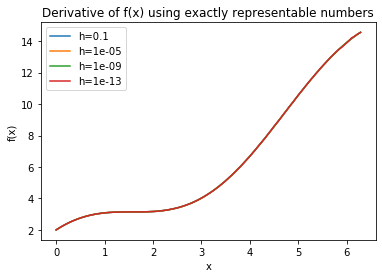

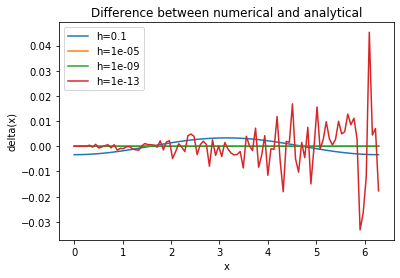

In [6]:
def df_exact(x, h):
    x1 = x - h
    x2 = x + h
    return (f(x2) - f(x1)) / (x2 - x1) # definition of exact derivative
    
for h in [0.1, 0.00001, 1e-9, 1e-13]: #loop and plot
    plt.plot(xdata, df_exact(xdata, h), label=f'h={h}') 

plt.title('Derivative of f(x) using exactly representable numbers')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.figure()

delta_exact = lambda x, h: df_exact(x, h) - 2*x - 2*np.cos(x) # difference between exact and analytical

for h in [0.1, 0.00001, 1e-9, 1e-13]: #loop and plot over h
    plt.plot(xdata, delta_exact(xdata, h), label=f'h={h}')
plt.title('Difference between numerical and analytical')
plt.xlabel('x')
plt.ylabel('delta(x)')
plt.legend()

for h in [0.1, 0.00001, 1e-9, 1e-13]: #compute rms
    rms = (1/100)*np.sum(delta_exact(xdata, h)**2)
    print(f"rms = {rms}, for h = {h}")

5.  Typically, the precision of physics measurements is a bigger effect than numerical approximation in representing quantities.  We can quantify this, at least for statistical uncertainties, using a random number generator.  Suppose we have data from measurements of a sine wave with noise.  We model this with a function $$d(t)=\sin(t)+a_n R,$$ where $R$ is a random number drawn from a gaussian distribution with $\sigma=1.0$ and $a_n$ is the size of the noise.  (with numpy you can generate such random numbers with numpy.random.randn())

Write a function that calculates d(t), with $a_n=0.05$.  Using the symmetric derivative, plot the RMS deviation between the numerical and analytic derivative: $d'(t)-cos(t)$ for 1000 points between 0 and $\pi$, as a function of $h$. 

Discuss the shape of this curve.  Is there an optimal step size for calculating this derivative? 


A brute force search reveals that h = 0.5428675439323859 is the optimal h value for the derivative with noise
A brute force search reveals that h = 2.6826957952797274e-06 is the optimal h value for the derivative without noise
As seen in the bottom most plot below, physical experiments are a higher source of error than numerical errors
The errors when taking the derivative only come into play at around h= 2.6826957952797274e-06, so the error when doing the experiment is usually much more serious


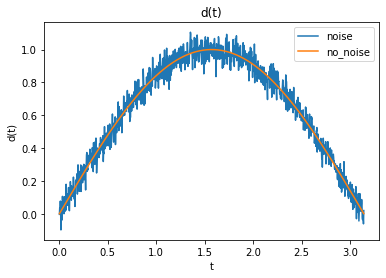

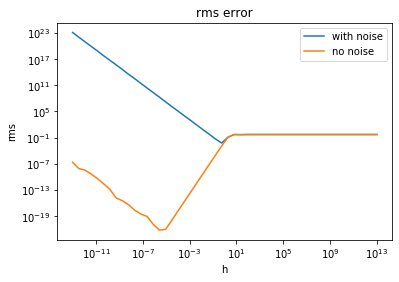

In [7]:
d = lambda t, a_n: np.sin(t) + a_n*np.random.randn(1000) #definition of d

tdata = np.linspace(0, np.pi, num=1000) #discretize t

plt.plot(tdata, d(tdata, 0.05), label='noise') # plot d, with 0.05 noise
plt.plot(tdata, d(tdata, 0), label='no_noise') # plot d with 0 noise
plt.xlabel('t')
plt.ylabel('d(t)')
plt.title('d(t)')
plt.legend()
plt.figure()

dd_symm = lambda t, h , a_n : (d(t + h, a_n) - d(t - h, a_n))/(2*h) #derivative of d using symmetric derivative

# intiialize rms values, so we can store them. One with and without
rms_noise = [] 
rms_no_noise = []

hdata = np.logspace(-13, 13, base=10) #intialize h as log space

for h in hdata: # loop over h
    rms_noise.append((1/1000)*np.sum((dd_symm(tdata, h, 0.05) - np.cos(tdata))**2)) #compute rms, with noise
    rms_no_noise.append((1/1000)*np.sum((dd_symm(tdata, h, 0) - np.cos(tdata))**2)) #compute rms, without noise
    
# plot loglog so that the graph scales isnt too crazy
plt.loglog(hdata, rms_noise, label='with noise')
plt.loglog(hdata, rms_no_noise, label='no noise')
plt.xlabel('h')
plt.ylabel('rms')
plt.title('rms error')
plt.legend()

print(f"A brute force search reveals that h = {hdata[np.argmin(rms_noise)]} is the optimal h value for the derivative with noise")
print(f"A brute force search reveals that h = {hdata[np.argmin(rms_no_noise)]} is the optimal h value for the derivative without noise")

print('As seen in the bottom most plot below, physical experiments are a higher source of error than numerical errors')
print(f'The errors when taking the derivative only come into play at around h= {hdata[np.argmin(rms_no_noise)]}, so the error when doing the experiment is usually much more serious')
